<img src="https://courseseeker.edu.au/assets/images/institutions/3016.png" width="200">
<div>Rusan Vaidya, 248864000</div>
<div>Statistical Thinking for Data Science</div>
<div>TD School</div>
<div>University of Technology Sydney</div


**Problem Statement :**

The telecommunication company seeks assistance in gaining a comprehensive understanding of their customers and identifying the customer segments that display the highest responsiveness to marketing campaigns. The response variable, subscribed, indicates whether the client subscribed to a new plan, which was the objective of the campaign.

In [3]:
from google.colab.drive import mount, flush_and_unmount

flush_and_unmount()
mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/sem2/STDS/Assignment/

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive/
/content/gdrive/MyDrive/sem2/STDS/Assignment


## Importing pandas and Loading Data

To begin our data analysis process, we start by importing the `pandas` library and loading our dataset from a CSV file.

In [4]:
import pandas as pd
from io import StringIO

file = 'TeleCom_Data-1.csv'

# Reading the content of the CSV file
with open(file, 'r') as file:
    lines = file.readlines()

# Removing the quotes
lines = [line.replace('"', '') for line in lines]

# Create a DataFrame
df = pd.read_csv(StringIO('\n'.join(lines)), sep=';')

# To display all columns in DataFrame
pd.set_option('display.max_columns', None)

# Display the DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Overview of data**

checking if the data types are correct or not and if there is any missing value/ Null values in the

In [10]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# view column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [6]:
# summary statistics of the numeric cols
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,40.021710,258.280427,2.567800,962.516707,0.172705,0.081901,93.575508,-40.501999,3.621422,5167.053344
std,10.419593,259.299856,2.770225,186.809028,0.493719,1.571037,0.578762,4.627358,1.734385,72.230334
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis

Here, we now explore the data and analyze the data what is the pattern of the data.

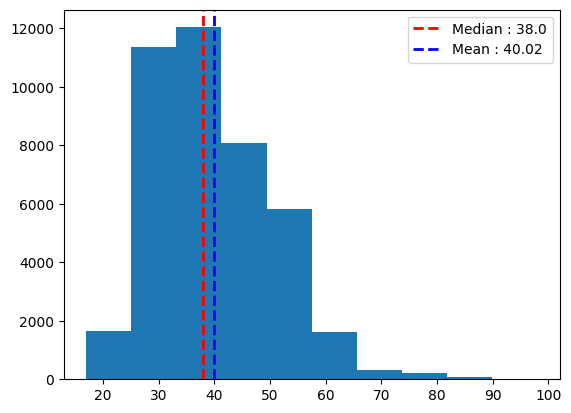

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df['age'])

# Calculate and plot the median
median = np.median(df['age'])
plt.axvline(median, color='red', linestyle='--', linewidth=2, label='Median')

# Calculate and plot the mean
mean = np.mean(df['age'])
plt.axvline(mean, color='blue', linestyle='--', linewidth=2, label='Mean')

plt.legend([f'Median : {median}', 'Mean : %.2f'%mean])

plt.show()

From the above histogram we can observe that age distribution is right skewed and most of the clients lie between the age ranging from 25 to 60. The median is 38 and the mean age is 40.02

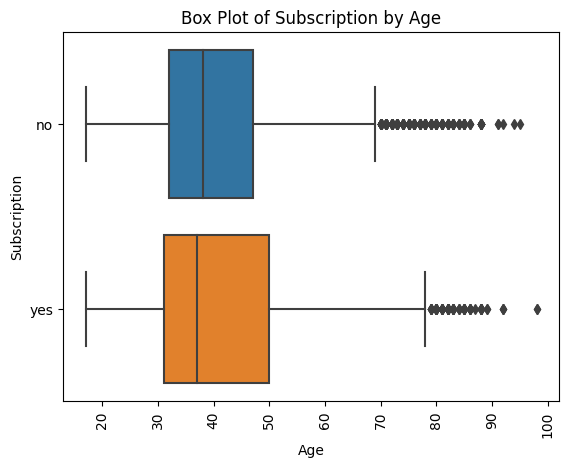

In [64]:
import seaborn as sns

# Box plot to see relation between subscription and age
sns.boxplot(x='age', y='y', data=df)
plt.title(f'Box Plot of Subscription by Age')
plt.xticks(rotation = 'vertical')
plt.xlabel('Age')
plt.ylabel('Subscription')
plt.show()

From the above box plot we can identify that the clients who are subscribers and non-subscribers IQR spans from around 30 to 50. The median age of subscribers is slightly lower than that of the non subscribers. The upper whisker is extended to 70 for non subscribers and 80 for subscribers. The outling clients shows it has age of 100 which indicates that there are older clients who have taken subscription of the the telecommunication plan.

From the box plot we can observe that age might not be an ideal factor in predicting subscription outcomes.

<Figure size 1000x600 with 0 Axes>

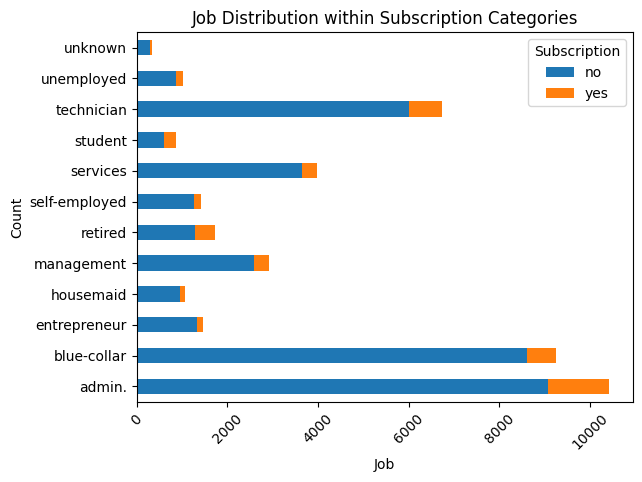

In [55]:
job_subscriber_crosstab = pd.crosstab(df['job'], df['y'], )

# Plot the stacked bar plot to see relation between age and job
plt.figure(figsize=(10, 6))
job_subscriber_crosstab.plot(kind='barh', stacked=True)
plt.title('Job Distribution within Subscription Categories')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

From the above stacked bar graph we can observe that admins have relatively higher number of subscribers compared to other jobs. Jobs like Enterprenuers, technician, management, housemaid, students and clients who are retired show similar trends as adimn. So, there marketing strategies should be applied by targeting these clients.

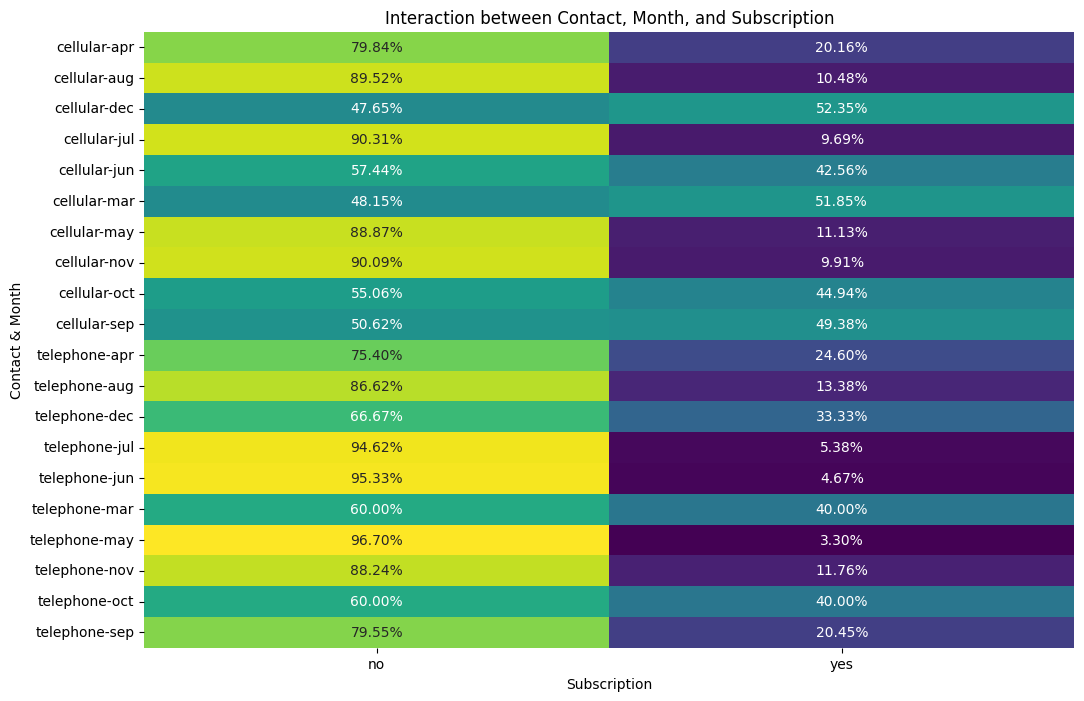

In [70]:
contact_month_subscriber_crosstab = pd.crosstab([df['contact'], df['month']], df['y'], normalize='index')

# Plot the heatmap to observe relation between contact, month and subscription
plt.figure(figsize=(12, 8))
sns.heatmap(contact_month_subscriber_crosstab, annot=True, cmap='viridis', fmt='.2%', cbar=False)
plt.title('Interaction between Contact, Month, and Subscription')
plt.xlabel('Subscription')
plt.ylabel('Contact & Month')
plt.show()

For cellular contact, months such as December, March, and October have relatively balanced subsciption outcomes whereas for August, July and November most of clients has no subsciptions.

Similarly, For telephone contact, same months(December, March and October) have relatively balanced subsciption outcomes whereas for May, June and July in when most of clients has no subsciptions.

The months in which balanced subscription could be ideal time to make marketing strategies to gain more subscribers.

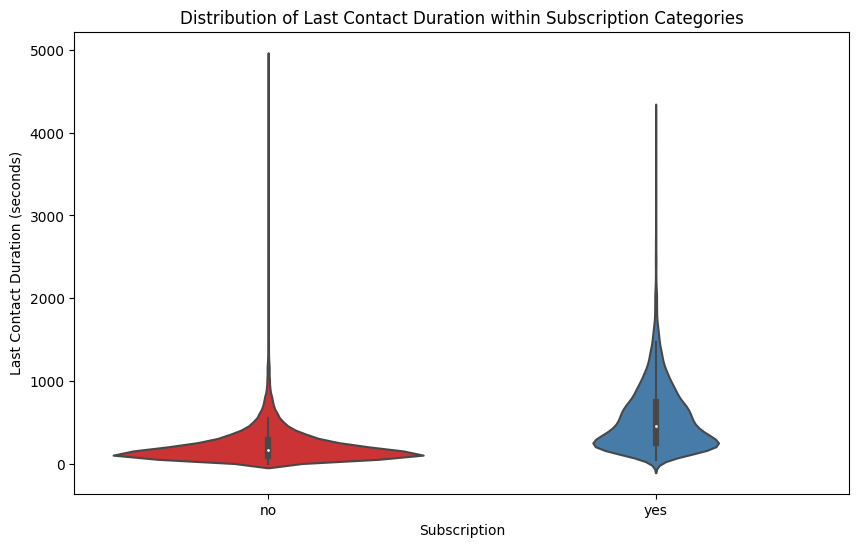

In [71]:
# violon plot to understand contact duration and subscription
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='y', y='duration', palette='Set1')
plt.title('Distribution of Last Contact Duration within Subscription Categories')
plt.xlabel('Subscription')
plt.ylabel('Last Contact Duration (seconds)')
plt.show()

From the violin plot we can observe that non subscribers have shorter contact duration overall, while subscribers show more contact duration.

This may imply that shorter contact duration indicate unsuccessful marketing resulting in lower subscription.

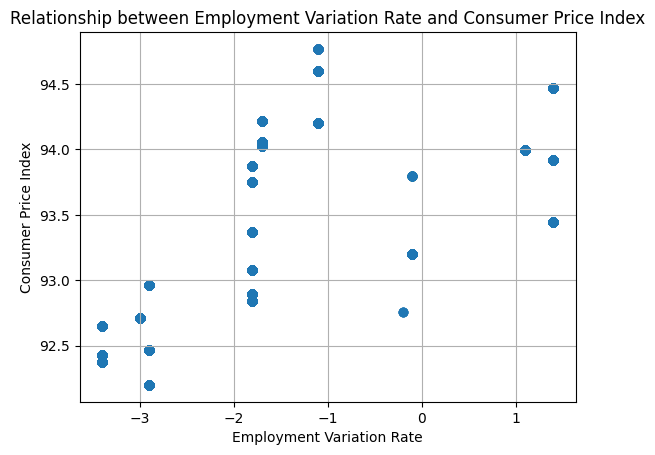

In [76]:
plt.scatter(df['emp.var.rate'], df['cons.price.idx'], alpha=0.5)
plt.title('Relationship between Employment Variation Rate and Consumer Price Index')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Consumer Price Index')
plt.grid(True)
plt.show()

From the scatterplot above we can observe that lower employment variation rate are associated with lower consumer price index and positive employment rate is linked with higher consumer price index.

y               no   yes
poutcome                
failure       3645   605
nonexistent  32418  3141
success        479   892


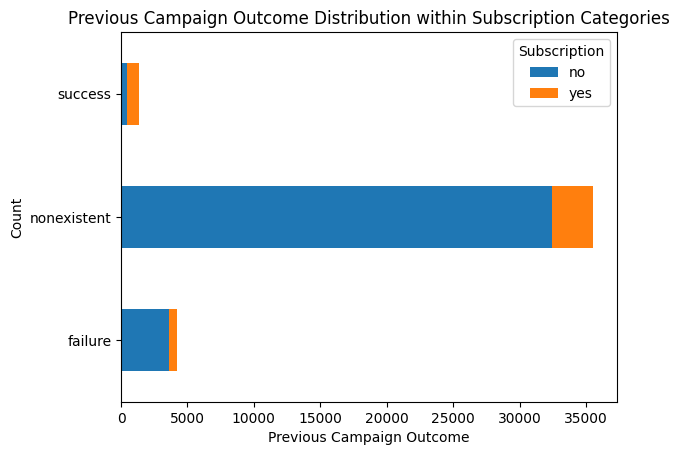

In [78]:
previous_outcome_subscriber_crosstab = pd.crosstab(df['poutcome'], df['y'])
print(previous_outcome_subscriber_crosstab)
previous_outcome_subscriber_crosstab.plot(kind='barh', stacked=True)
plt.title('Previous Campaign Outcome Distribution within Subscription Categories')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscription')
plt.show()

From the above stacked bar graph we can observe that most of the subscribers had non existenct previous campaign and the number of successful subscribers are more than that of failure.